In [1]:
import pandas as pd
import numpy as np

C:\Users\91817\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
X = df.iloc[:, :8]
y = df.iloc[:, 8:]

In [6]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [7]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

clf = DecisionTreeClassifier(random_state = 1)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [11]:
X_train = scaler.fit_transform(X_train)

In [12]:
X_test = scaler.transform(X_test)

In [13]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [14]:
pred = clf.predict(X_test)
score1 = accuracy_score(y_test, pred)
score1

0.6948051948051948

In [15]:
from sklearn.tree import export_text
txt_tree = export_text(clf)
print(txt_tree)

|--- feature_1 <= 0.20
|   |--- feature_7 <= -0.41
|   |   |--- feature_5 <= 1.78
|   |   |   |--- feature_5 <= -0.12
|   |   |   |   |--- feature_0 <= 1.07
|   |   |   |   |   |--- feature_6 <= 0.62
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_6 >  0.62
|   |   |   |   |   |   |--- feature_6 <= 0.73
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_6 >  0.73
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  1.07
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_5 >  -0.12
|   |   |   |   |--- feature_6 <= 1.32
|   |   |   |   |   |--- feature_2 <= -2.38
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 >  -2.38
|   |   |   |   |   |   |--- feature_7 <= -0.92
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_7 >  -0.92
|   |   |   |   |   |   |   |--- feature_5 <= 0.21
|   |   |   |   |   |   |   |   |--- feature_6 <= -0.82
|   |   |   |   |   | 

In [16]:
from sklearn.tree import plot_tree

In [17]:
param_dist = {
    "criterion": ['gini', 'entropy'],
    "max_depth": [1,2,3,4,5,6,7,None],
    "splitter": ['best', 'random'],
    "max_leaf_nodes": [10,20,30,40,50,60,70,100, None],
    "max_features": [2,3,4,5,6,7, None]
}

In [18]:
from sklearn.model_selection import GridSearchCV

clf1 = DecisionTreeClassifier(random_state = 1)

clf1.fit(X_train, y_train)

grid = GridSearchCV(clf1, param_grid = param_dist, cv = 10, n_jobs = -1)


In [19]:
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None],
                         'max_features': [2, 3, 4, 5, 6, 7, None],
                         'max_leaf_nodes': [10, 20, 30, 40, 50, 60, 70, 100,
                                            None],
                         'splitter': ['best', 'random']})

In [20]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, None],
                         'max_features': [2, 3, 4, 5, 6, 7, None],
                         'max_leaf_nodes': [10, 20, 30, 40, 50, 60, 70, 100,
                                            None],
                         'splitter': ['best', 'random']})

In [21]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=7, max_features=5, max_leaf_nodes=20,
                       random_state=1)

In [22]:
grid.best_score_

0.7525118984664199

In [23]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 5,
 'max_leaf_nodes': 20,
 'splitter': 'best'}

In [24]:
clf1 = DecisionTreeClassifier(criterion = 'gini', max_depth = 7, max_features = 5, max_leaf_nodes = 20)

In [25]:
clf1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, max_features=5, max_leaf_nodes=20)

In [26]:
pred =clf1.predict(X_test)
score2 = accuracy_score(y_test, pred)

score2

0.7857142857142857

[Text(2587.090909090909, 2548.125, 'X[1] <= 0.197\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(913.0909090909091, 2208.375, 'X[7] <= -0.407\ngini = 0.311\nsamples = 389\nvalue = [314, 75]'),
 Text(608.7272727272727, 1868.625, 'gini = 0.167\nsamples = 217\nvalue = [197, 20]'),
 Text(1217.4545454545455, 1868.625, 'X[5] <= -0.732\ngini = 0.435\nsamples = 172\nvalue = [117, 55]'),
 Text(608.7272727272727, 1528.875, 'X[5] <= -2.909\ngini = 0.108\nsamples = 35\nvalue = [33, 2]'),
 Text(304.3636363636364, 1189.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(913.0909090909091, 1189.125, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]'),
 Text(1826.1818181818182, 1528.875, 'X[4] <= 0.523\ngini = 0.474\nsamples = 137\nvalue = [84, 53]'),
 Text(1521.818181818182, 1189.125, 'X[6] <= -0.793\ngini = 0.44\nsamples = 113\nvalue = [76, 37]'),
 Text(1217.4545454545455, 849.375, 'gini = 0.165\nsamples = 22\nvalue = [20, 2]'),
 Text(1826.1818181818182, 849.375, 'X[1] <= -0.783\ngini = 0.473

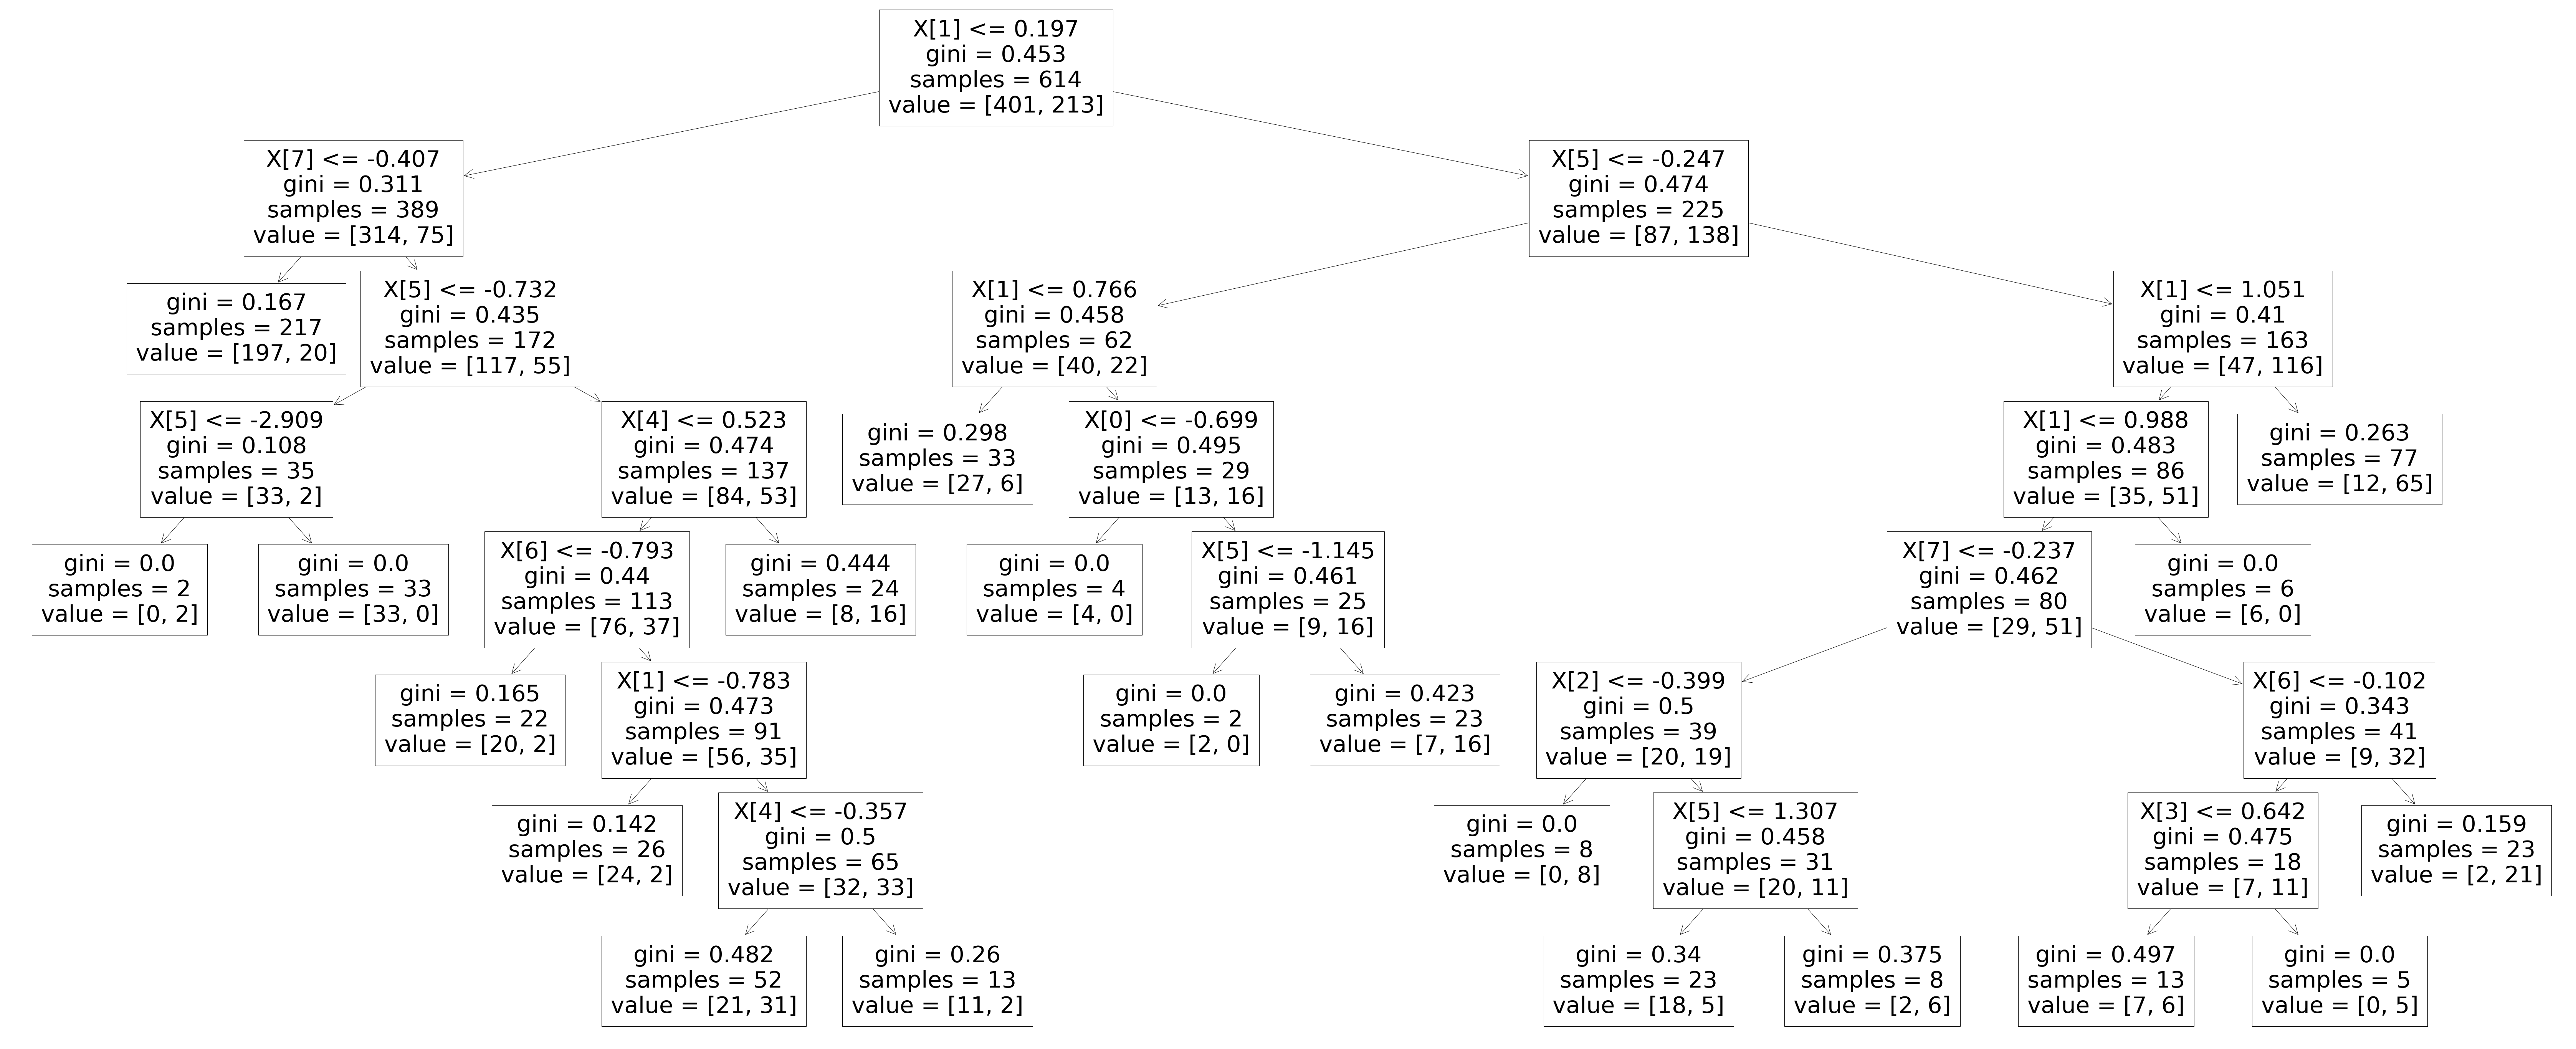

In [27]:
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 120, 50

plot_tree(clf1)